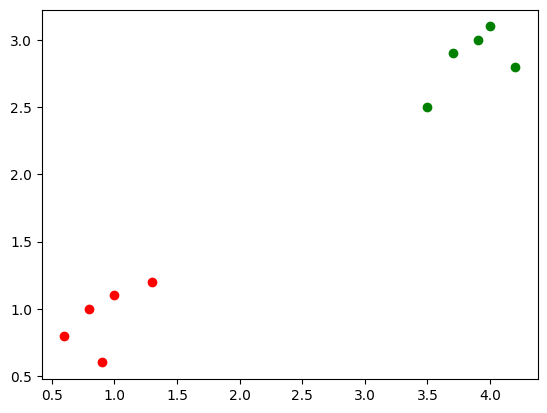

epoch: 0, error: -0.17998475670280417
epoch: 1, error: -0.1978069972282808
epoch: 2, error: -0.20736599146338822
epoch: 3, error: -0.21219926011943394
epoch: 4, error: -0.21417115545308082
epoch: 5, error: -0.21434982856045082
epoch: 6, error: -0.21338291070583523
epoch: 7, error: -0.21167864401491437
epoch: 8, error: -0.20950140829106592
epoch: 9, error: -0.2070256605245578
epoch: 10, error: -0.20436801328385049
epoch: 11, error: -0.20160707606181472
epoch: 12, error: -0.19879609708593
epoch: 13, error: -0.195971200512388
epoch: 14, error: -0.19315684569939973
epoch: 15, error: -0.19036949279393237
epoch: 16, error: -0.18762008892105544
epoch: 17, error: -0.18491576789922665
epoch: 18, error: -0.18226101970089945
epoch: 19, error: -0.17965849927760102
epoch: 20, error: -0.17710958838077845
epoch: 21, error: -0.17461478722414642
epoch: 22, error: -0.17217398835294676
epoch: 23, error: -0.1697866686272913
epoch: 24, error: -0.16745202407056267
epoch: 25, error: -0.16516906472068646
epoc

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from random import randint
from matplotlib import pyplot as plt
from math import exp,log

x1 = [0.9, 1.3, 0.6, 0.8, 1.0]
y1 = [0.6, 1.2, 0.8, 1.0, 1.1]
x2 = [3.5, 3.9, 4.2, 3.7, 4.0]
y2 = [2.5, 3.0, 2.8, 2.9, 3.1]

plt.scatter(x=x1, y=y1, color='red')
plt.scatter(x=x2, y=y2, color='green')
plt.show()

inputs = [(x1[i], y1[i]) for i in range(len(x1))]
targets = [0 for i in range(len(x1))]
inputs += [(x2[i], y2[i]) for i in range(len(x2))]
targets += [1 for i in range(len(x2))]

weights = [randint(-100, 100) / 100 for _ in range(3)]

def weighted_z(point):
    z = [item * weights[i] for i, item in enumerate(point)]
    return sum(z) + weights[-1]

def logistic_function(z):
    return 1/(1 + exp(-z))

def logistic_error():
    errors = []

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if output == 1:
            output = 0.99999

        if output == 0:
            output = 0.00001

        error = -(target * log(output) - (1 - target) * log(1 - output))
        errors.append(error)

    return sum(errors) / len(errors)

lr = 0.2

for epoch in range(200):
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        for j in range(len(weights) - 1):
            weights[j] -= lr * point[j] * (output - target) * (1 / len(inputs))

        weights[-1] -= lr * (output - target) * (1 / len(inputs))

    print(f"epoch: {epoch}, error: {logistic_error()}")

print(weights)

def test():
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]
        print(f"output: {round(output, 2)}, target: {target}")
test()

def accuracy():
    true_outputs = 0

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if round(output) == target:
            true_outputs += 1

    return true_outputs, len(inputs)

print("accuracy:", accuracy())

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))